<a href="https://colab.research.google.com/github/SoniyaGulia/colab/blob/main/task_2_for_owl_intern.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Netflix Data: Cleaning, Analysis and Visualization**

Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
# remove warnings
import warnings
warnings.filterwarnings('ignore')

Load the Dataset

In [ ]:
data = pd.read_csv('/content/netflix1.csv.zip')
# Display the first five rows of the dataset
data.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


 Data Cleaning

In [ ]:
print(data.isnull().sum())

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64


In [ ]:
data.duplicated().any()

np.False_

In [ ]:
data['date_added'] = pd.to_datetime(data['date_added'])

Exploratory Data Analysis (EDA)

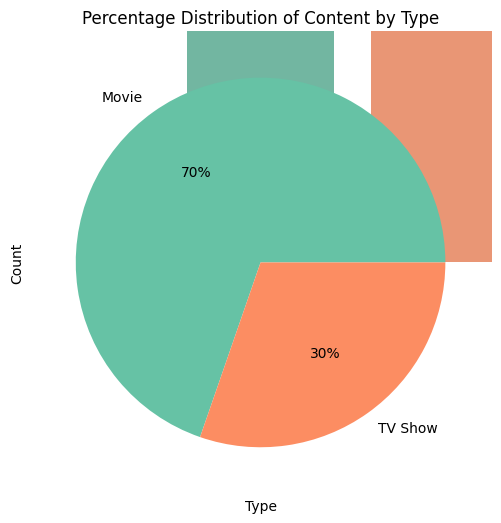

<Axes: >

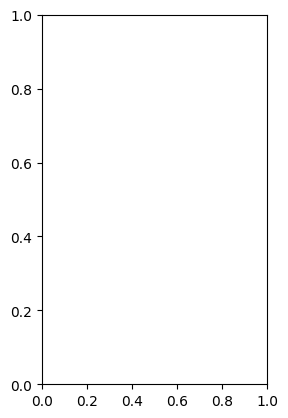

In [ ]:
type_counts = data['type'].value_counts()
# Plot the distribution
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.barplot(x=type_counts.index, y=type_counts.values, palette='Set2')
plt.title('Distribution of Content by Type')
plt.xlabel('Type')
plt.ylabel('Count')
plt.pie(type_counts, labels=type_counts.index, autopct='%.0f%%', colors=sns.color_palette('Set2'))
plt.title('Percentage Distribution of Content by Type')
plt.show()
plt.subplot(1, 2, 2)

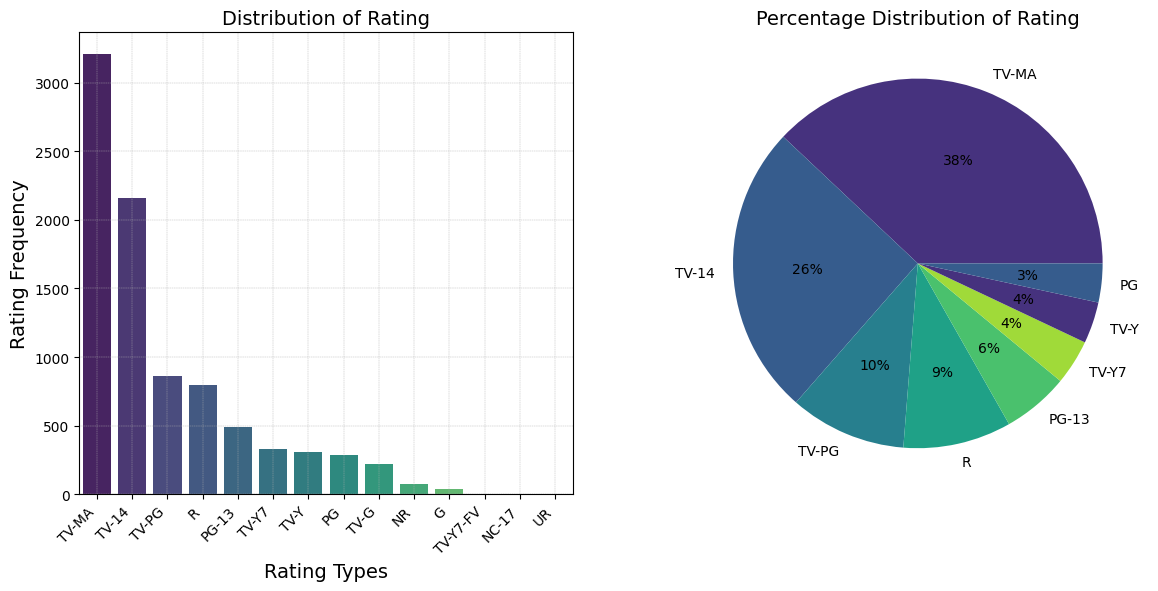

In [ ]:
ratings = data['rating'].value_counts().reset_index().sort_values(by='count', ascending=False)
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.barplot(x='rating', y='count', data=ratings, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.xlabel("Rating Types", fontsize=14)
plt.ylabel("Rating Frequency", fontsize=14)
plt.title('Distribution of Rating', fontsize=14)
plt.grid(True, which='both', linestyle='--', linewidth=0.3)
plt.subplot(1, 2, 2)
plt.pie(ratings['count'][:8], labels=ratings['rating'][:8], autopct='%.0f%%', colors=sns.color_palette('viridis'))
plt.title('Percentage Distribution of Rating', fontsize=14)
plt.show()

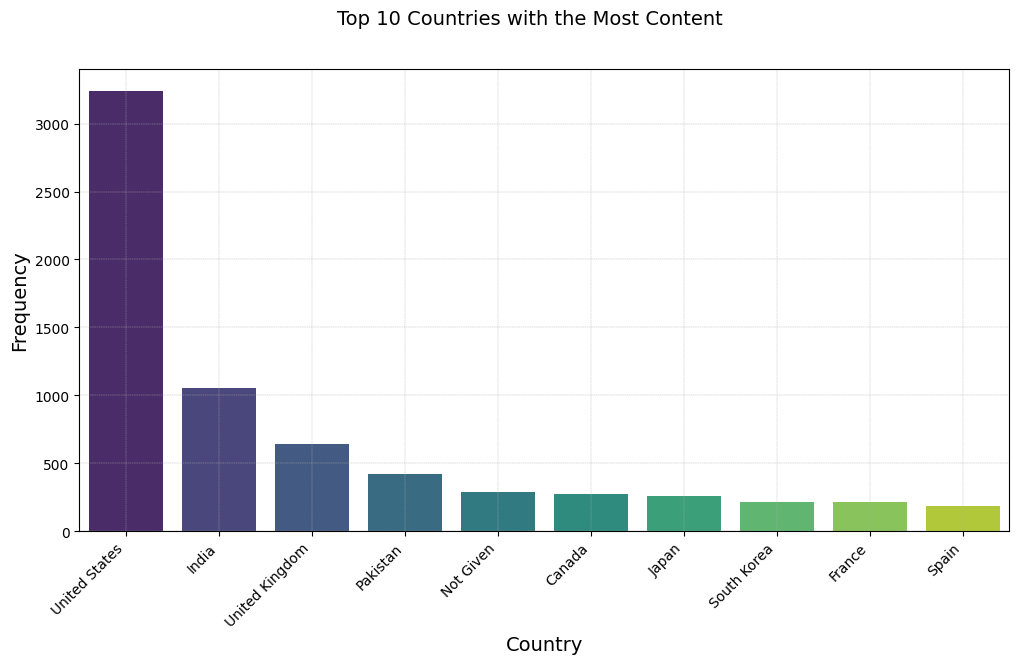

In [ ]:
top_ten_countries = data['country'].value_counts().reset_index().sort_values(by='count', ascending=False)[:10]
plt.figure(figsize=(12, 6))
sns.barplot(x='country', y='count', data=top_ten_countries, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.xlabel("Country", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.suptitle("Top 10 Countries with the Most Content", fontsize=14)
plt.grid(True, which='both', linestyle='--', linewidth=0.3)
plt.show()

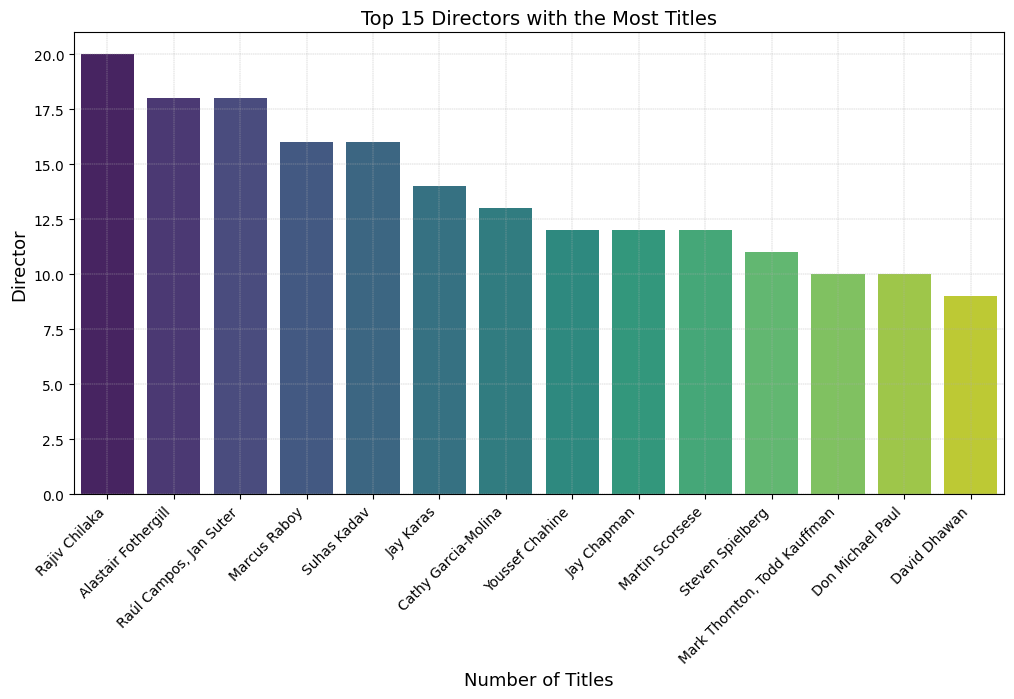

In [ ]:
# Count titles by director
top_directors = data['director'].value_counts().reset_index().sort_values(by='count', ascending=False)[1:15]
# Plot top directors
plt.figure(figsize=(12, 6))
sns.barplot(y='count', x='director', data=top_directors, palette='viridis')
plt.title('Top 15 Directors with the Most Titles', fontsize=14)
plt.xlabel('Number of Titles', fontsize=13)
plt.ylabel('Director', fontsize=13)
plt.xticks(rotation=45, ha='right')
plt.grid(True, which='both', linestyle='--', linewidth=0.3)
plt.show()

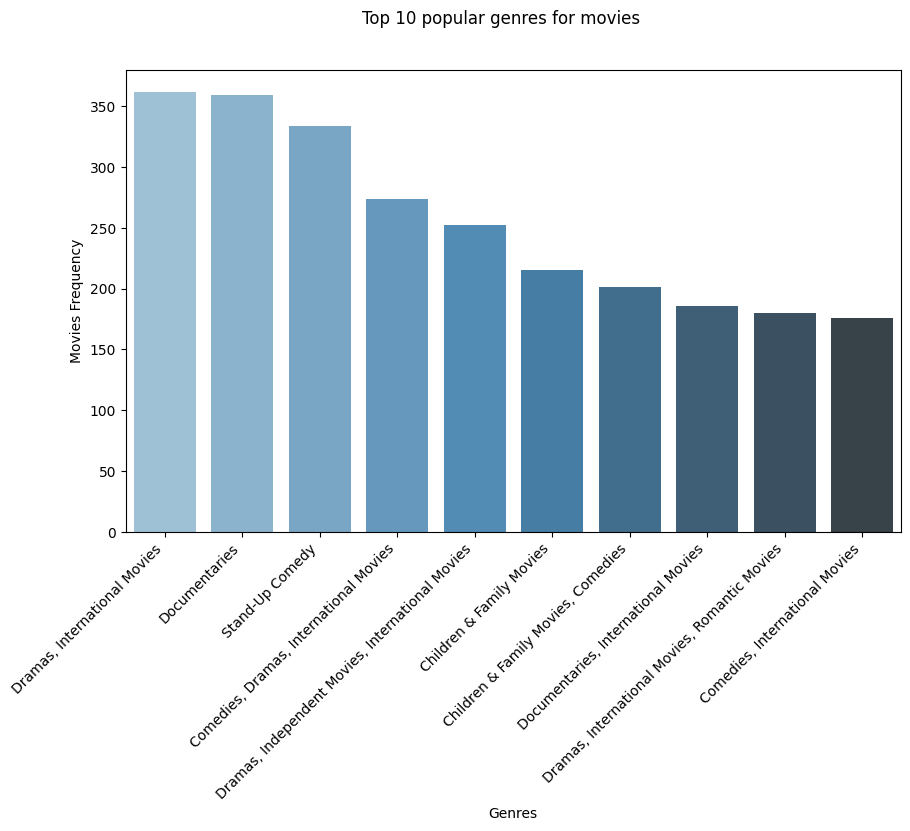

In [ ]:
popular_movie_genre=data[data['type']=='Movie'].groupby("listed_in").size().sort_values(ascending=False)[:10]
popular_series_genre=data[data['type']=='TV Show'].groupby("listed_in").size().sort_values(ascending=False)[:10]
plt.figure(figsize=(10, 6))
sns.barplot(x=popular_movie_genre.index, y=popular_movie_genre.values, palette='Blues_d')
plt.xticks(rotation=45, ha='right')
plt.xlabel("Genres")
plt.ylabel("Movies Frequency")
plt.suptitle("Top 10 popular genres for movies")
plt.show()

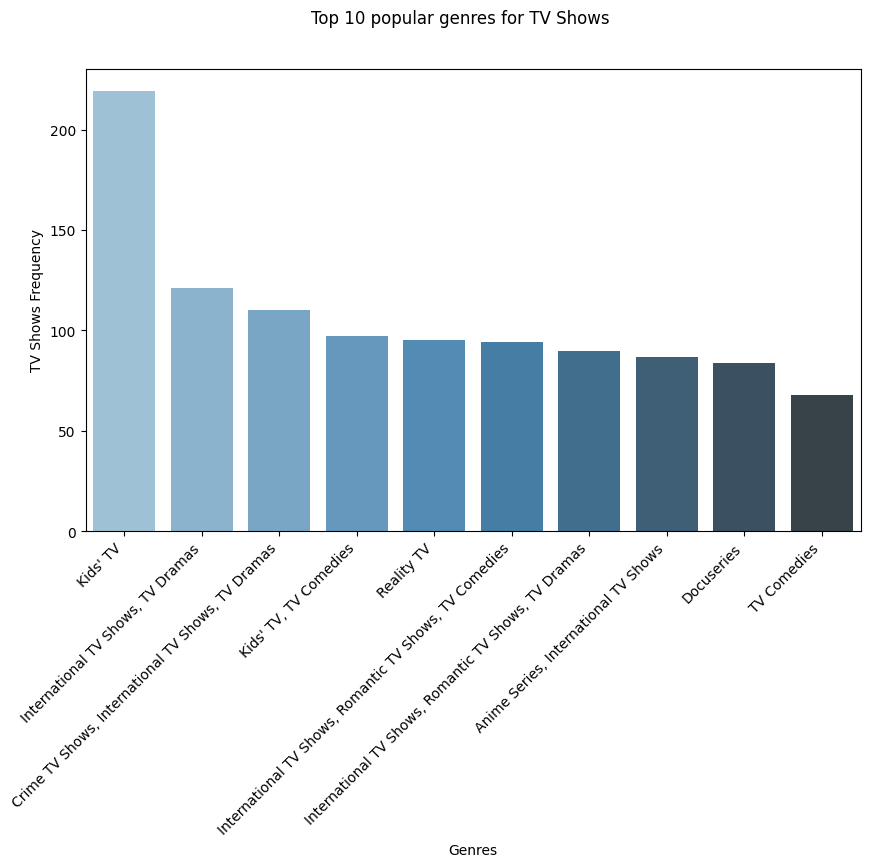

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=popular_series_genre.index, y=popular_series_genre.values, palette='Blues_d')
plt.xticks(rotation=45, ha='right')
plt.xlabel("Genres")
plt.ylabel("TV Shows Frequency")
plt.suptitle("Top 10 popular genres for TV Shows")
plt.show()

In [ ]:
data['year_added'] = data['date_added'].dt.year
data['month_added'] = data['date_added'].dt.month

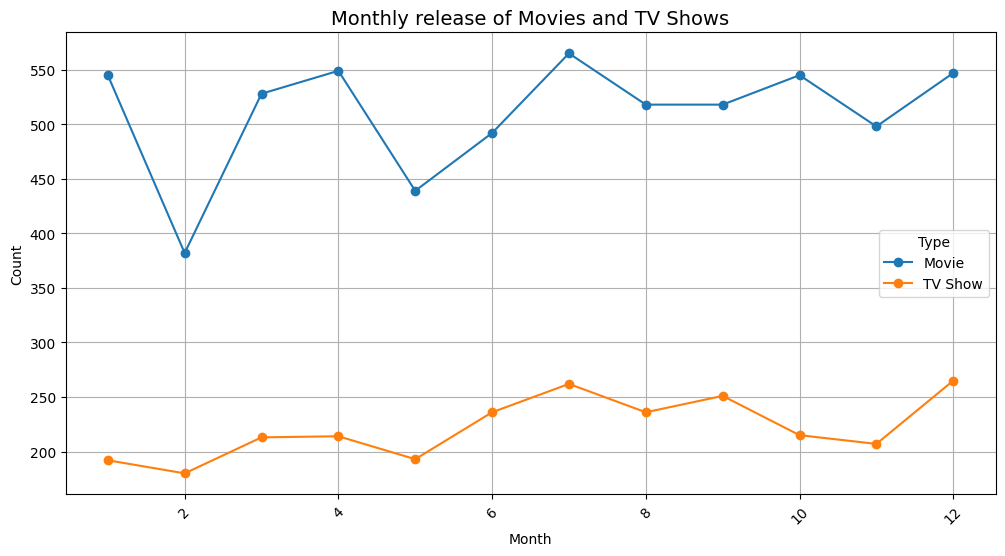

In [ ]:
plt.figure(figsize=(12, 6))
data.groupby(['month_added', 'type']).size().unstack().plot(kind='line', marker='o', ax=plt.gca())
plt.title('Monthly release of Movies and TV Shows', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Type')
plt.grid(True)
plt.show()

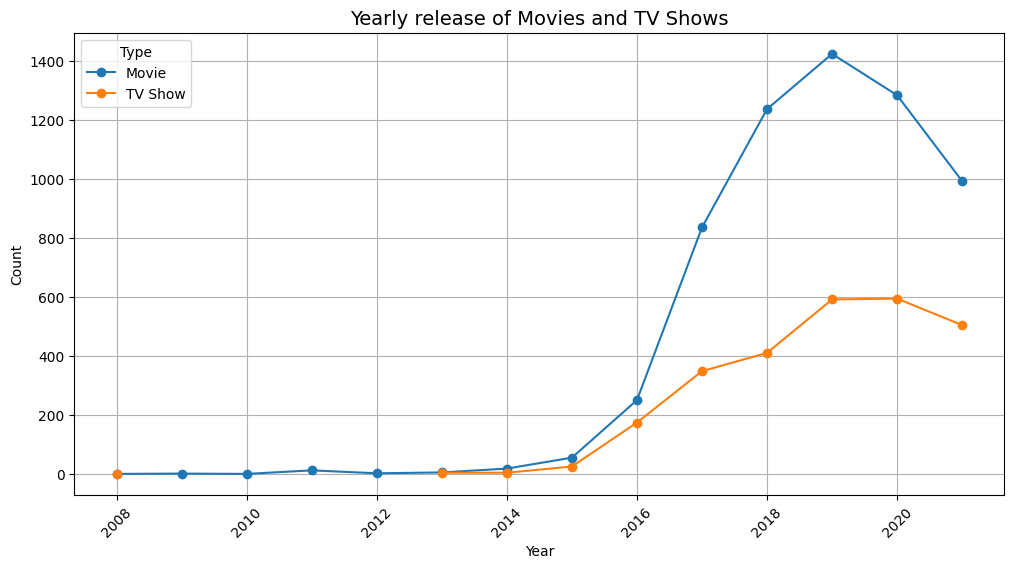

In [ ]:
plt.figure(figsize=(12, 6))
data.groupby(['year_added', 'type']).size().unstack().plot(kind='line', marker='o', ax=plt.gca())
plt.title('Yearly release of Movies and TV Shows', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Type')
plt.grid(True)
plt.show()

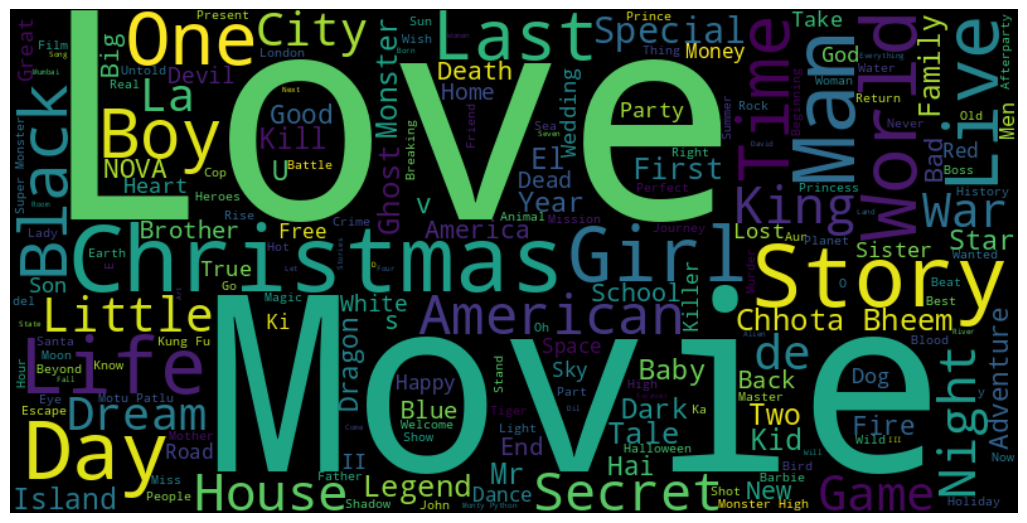

In [ ]:
# Create a word cloud for movie titles
movie_titles = data[data['type'] == 'Movie']['title']
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(' '.join(movie_titles))
# Display the word cloud
plt.figure(figsize=(13, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()